In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [41]:
#read pd as hplc, read spec as from txt
spec = np.genfromtxt('C:/computer_harddrive/oceanus/HPLC/pigment_hplc/spec.txt',
                    delimiter='\t')
xl = pd.ExcelFile("C:/computer_harddrive/oceanus/HPLC/pigment_hplc/hplc_pigment.xlsx")
df = xl.parse("Sheet1")
df['DP'] = (1.41*df['Fuco']+1.41*df['Perid']+1.27*df['Hex']+0.6*df['Allo']
            +0.35*df['But']+1.01*df['Chl_b']+0.86*df['Zea'])
df.head()

,Original PI Sample Label,Sequential Day of Year,GMT Time,Longitude,Latitude,Tot_Chl_a,Fuco,Perid,Hex,Allo,But,Chl_b,Zea,DP
0,NPAC_HPLC_002,193,19:46:00,56.856051,-145.009177,0.406,0.066,0.012,0.153,0.005,0.046,0.020,0.009,0.35133
1,NPAC_HPLC_003,194,14:28:00,55.506606,-145.009927,0.281,0.065,0.010,0.101,0.004,0.032,0.010,0.003,0.26030
2,NPAC_HPLC_006,195,03:04:00,55.220081,-141.342119,0.390,0.051,0.012,0.164,0.012,0.039,0.027,0.008,0.35211
3,NPAC_HPLC_007,195,06:00:00,55.166045,-140.647076,0.429,0.104,0.013,0.141,0.009,0.030,0.040,0.014,0.41238
4,NPAC_HPLC_009,195,13:56:00,55.006028,-138.592163,0.658,0.087,0.030,0.308,0.012,0.059,0.043,0.010,0.63601


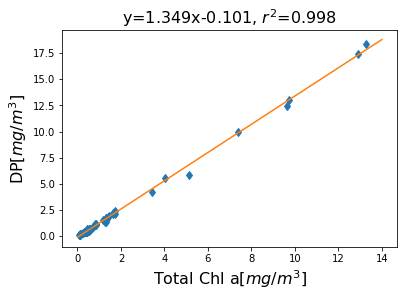

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

x = df['DP']
y = df['Tot_Chl_a']

model.fit(x[:, np.newaxis], y)
r = model.score(x[:, np.newaxis], y)
xfit = np.linspace(0, 14, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.plot(x, y, 'd')
plt.plot(xfit, yfit)
sr = "y=%.3fx%.3f, $r^2$=%.3f" % (model.coef_[0], model.intercept_, r)
plt.title(sr, fontsize=16) 
plt.xlabel('Total Chl a[$mg/m^3$]', fontsize=16)
plt.ylabel('DP[$mg/m^3$]', fontsize=16)

In [124]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

micro = 1.4*df['Fuco']/df['DP']
r_score = []

for i in range(50):
    pos = (spec[:,2]/spec[:,137] > 2) & (spec[:,2]/spec[:,137] < 4)
    x = spec[pos,i]#/spec[pos,137]
    y = micro[pos]

    model.fit(x[:, np.newaxis], y)
    r = model.score(x[:, np.newaxis], y)
    r_score=r_score+[r]
    


[0.47788424268405783,
 0.48072654337146803,
 0.48060397171021962,
 0.47996159908186631,
 0.48163795470916287,
 0.48049871267222222,
 0.47641407897908639,
 0.47103932052605019,
 0.46478619051070608,
 0.46866078843384257,
 0.47249132651588882,
 0.47470465382108479,
 0.47674785577554507,
 0.474569272719369,
 0.4718879058584276,
 0.4723279864889619,
 0.47385003483787702,
 0.47351003157841476,
 0.47293096633718634,
 0.47197424240934882,
 0.47096101470054746,
 0.46718079541684066,
 0.46329453071888083,
 0.46278808311463698,
 0.46378529452156003,
 0.46428785527030542,
 0.46428431470437814,
 0.46397901190877655,
 0.46240662994075643,
 0.46102554126204387,
 0.46073007709257829,
 0.46045325184819863,
 0.45947503737600992,
 0.458451071958211,
 0.4581195381500347,
 0.45773873296770595,
 0.4567881751982244,
 0.45541836486898202,
 0.45445302132820664,
 0.45461953235317115,
 0.45481158986911896,
 0.45514892623279302,
 0.45550185271561749,
 0.45577301673681714,
 0.45602356359267815,
 0.456357261577136

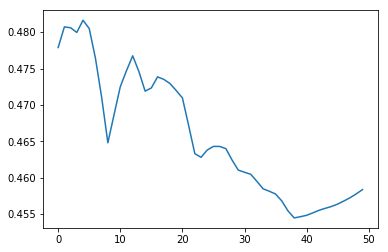

In [125]:
pos = (spec[:,2]/spec[:,137] > 2) & (spec[:,2]/spec[:,137] < 4)
#plt.plot(spec[pos,40]/spec[pos,137],micro[pos],'.')
plt.plot(r_score)
r_score

In [104]:
spec.shape

(65, 151)

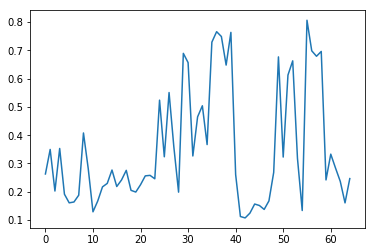

In [81]:
plt.plot(y)